In [18]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



In [12]:
def bench_em(estimator, name, data, labels, sample_size):
    t0 = time()
    estimator.fit(data)
    y_pred = estimator.predict(data)
    return {
        'init': name,
        'time': (time() - t0),
        'avg_log': estimator.score(data),
        'aic': estimator.aic(data),
        'bic': estimator.bic(data),
        'f1_score': metrics.f1_score(labels, y_pred, average='weighted'),
        'homogenity': metrics.homogeneity_score(labels, y_pred),
        'completeness': metrics.completeness_score(labels, y_pred),
        'silhouette': metrics.silhouette_score(data, y_pred,metric='euclidean')    
    }


def em_analysis(X, y):
    data = scale(X)
    target = y

    n_samples, n_features = data.shape
    n_classes = len(np.unique(target))
    labels = target
    sample_size = n_samples

    n_clusters_range = list(np.arange(2,20,1))
    vals = []
    for n in n_clusters_range:
        estimator = GaussianMixture(n_components=n,covariance_type='spherical', max_iter=1000, init_params= 'kmeans')
        _bench = bench_em(estimator, name="em", data=data, labels=labels, sample_size=sample_size)
        _bench['n_clusters'] = n
        vals.append(_bench)

    df = pd.DataFrame(vals)    
    
    ax1 = df.plot(x='n_clusters', 
                  y=['aic','bic'], 
                  title="Expectation Maximization AIC/BIC Curve")
    ax1.set_xlabel("Number of mixture components")

    ax1 = df.plot(x='n_clusters', 
                  y=['homogenity','completeness', 'silhouette', 'f1_score'], 
                  title="Expectation Maximization Performance evaluation")
    ax1.set_xlabel("Number of mixture components")
    
    ax1 = df.plot(x='n_clusters', 
                  y=['avg_log'], 
                  title="Expectation Maximization Average Log Likelihood")
    ax1.set_xlabel("Number of mixture components")
    


[[0.         0.46428571 1.         ... 0.         0.         1.        ]
 [1.         0.03571429 0.75       ... 0.         0.         1.        ]
 [0.33333333 0.41071429 0.75       ... 0.         0.         0.        ]
 ...
 [0.         0.57142857 0.75       ... 0.         0.         1.        ]
 [0.33333333 0.08928571 1.         ... 0.         1.         0.        ]
 [0.         0.35714286 0.5        ... 0.         0.         1.        ]]


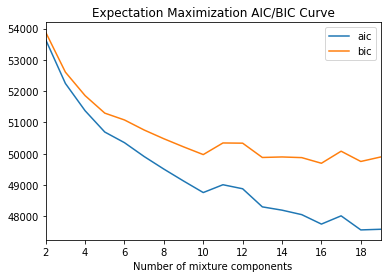

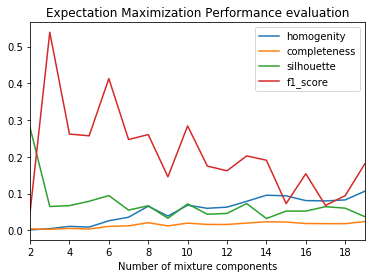

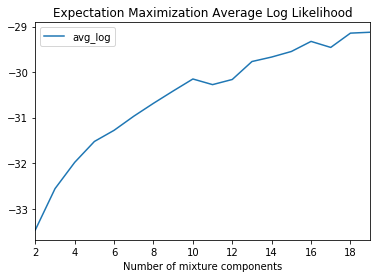

In [33]:
np.random.seed(5)

credit=np.genfromtxt('../dataset/german.data-numeric.txt') 
X,y = credit[:,:-1], credit[:,-1:].squeeze() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

#Preprocessing the data between 0 and 1
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# means_init = np.array([X[y == i].mean(axis=0) for i in range(7)])

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

em_analysis(X_train, y_train)

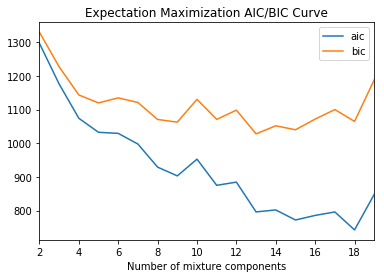

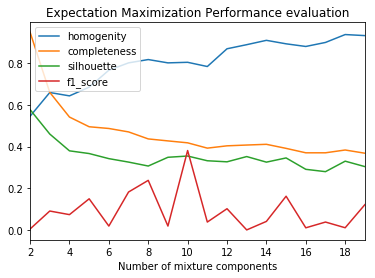

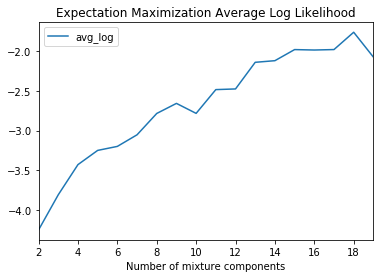

In [14]:
np.random.seed(5)

from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data, data.target
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

em_analysis(X, y)

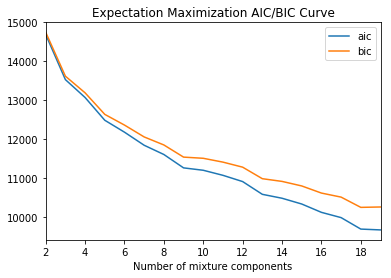

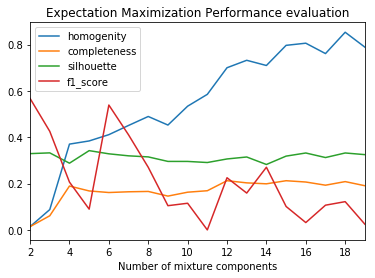

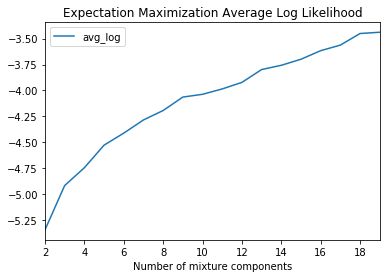

In [15]:
np.random.seed(5)

credit=np.genfromtxt('../dataset/data_banknote_authentication.txt', delimiter=',') 
X,y = credit[:,:-1], credit[:,-1:].squeeze() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)
em_analysis(X, y)